# Exploratory analysis

Kaggle competition https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting

In [1]:
import pylab as py
import pandas as pandas
%matplotlib inline
from datetime import datetime
import seaborn as sns

I have initially aggregated data with some SQL queries to match restaurant information with reservation data. This is written in a different file and the results are summarized in CSV files. 

In [2]:
try:
    file_reservations = open('reservations.csv','r')
    file_visits = open('visits.csv','r')
except FileNotFoundError:
    %run "CombineRestaurantsWithSQL"
    file_reservations = open('reservations.csv','r')
    file_visits = open('visits.csv','r')
reservations = pandas.read_csv('reservations.csv')
visits = pandas.read_csv('visits.csv')

Each reservation contains information about 
* Time when the reservation was requested.
* Time for the restaurant visit.
* Number of people to visit.
* Restaurant.

There are two reservation services, AIR and HPG. The most popular is HPG, by far, with 2 million reservations compared to 90k reservations by AIR.

In [3]:
reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092698 entries, 0 to 2092697
Data columns (total 14 columns):
service             object
hpg_store_id        object
air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
hpg_genre_name      object
hpg_area_name       object
air_genre_name      object
air_area_name       object
hpg_latitude        float64
hpg_longitude       float64
air_latitude        float64
air_longitude       float64
dtypes: float64(4), int64(1), object(9)
memory usage: 223.5+ MB


In [4]:
reserves_onlyHPG_byHPG = reservations[(~py.isnan(reservations['hpg_latitude']))&(py.isnan(reservations['air_latitude']))&(reservations['service']=='HPG')]
reserves_onlyHPG_byAIR = reservations[(~py.isnan(reservations['hpg_latitude']))&(py.isnan(reservations['air_latitude']))&(reservations['service']=='AIR')]
reserves_onlyAIR_byHPG = reservations[(py.isnan(reservations['hpg_latitude']))&(~py.isnan(reservations['air_latitude']))&(reservations['service']=='HPG')]
reserves_onlyAIR_byAIR = reservations[(py.isnan(reservations['hpg_latitude']))&(~py.isnan(reservations['air_latitude']))&(reservations['service']=='AIR')]
reserves_both_byHPG = reservations[(~py.isnan(reservations['hpg_latitude']))&(~py.isnan(reservations['air_latitude']))&(reservations['service']=='HPG')]
reserves_both_byAIR = reservations[(~py.isnan(reservations['hpg_latitude']))&(~py.isnan(reservations['air_latitude']))&(reservations['service']=='AIR')]
reserves_neither_byHPG = reservations[(py.isnan(reservations['hpg_latitude']))&(py.isnan(reservations['air_latitude']))&(reservations['service']=='HPG')]
reserves_neither_byAIR = reservations[(~py.isnan(reservations['hpg_latitude']))&(~py.isnan(reservations['air_latitude']))&(reservations['service']=='AIR')]

In [5]:
print('Number of reservations and store information:')
total = len(reservations)
this = len(reserves_both_byHPG)
print('{:7d} ({:4.1f} %) reservations with store information from HPG and AIR, made by HPG'.format(this, this/total*100))
this = len(reserves_both_byAIR)
print('{:7d} ({:4.1f} %) reservations with store information from HPG and AIR, made by AIR'.format(this, this/total*100))
this = len(reserves_onlyHPG_byHPG)
print('{:7d} ({:4.1f} %) reservations with store information from HPG only, made by HPG'.format(this, this/total*100))
this = len(reserves_onlyHPG_byAIR)
print('{:7d} ({:4.1f} %) reservations with store information from HPG only, made by AIR'.format(this, this/total*100))
this = len(reserves_onlyAIR_byHPG)
print('{:7d} ({:4.1f} %) reservations with store information from AIR only, made by HPG'.format(this, this/total*100))
this = len(reserves_onlyAIR_byAIR)
print('{:7d} ({:4.1f} %) reservations with store information from AIR only, made by AIR'.format(this, this/total*100))
this = len(reserves_neither_byHPG)
print('{:7d} ({:4.1f} %) reservations with no store information, made by HPG'.format(this, this/total*100))
this = len(reserves_neither_byAIR)
print('{:7d} ({:4.1f} %) reservations with no store information, made by AIR'.format(this, this/total*100))

Number of reservations and store information:
  13528 ( 0.6 %) reservations with store information from HPG and AIR, made by HPG
  16154 ( 0.8 %) reservations with store information from HPG and AIR, made by AIR
 857780 (41.0 %) reservations with store information from HPG only, made by HPG
      0 ( 0.0 %) reservations with store information from HPG only, made by AIR
      0 ( 0.0 %) reservations with store information from AIR only, made by HPG
  56114 ( 2.7 %) reservations with store information from AIR only, made by AIR
1129012 (54.0 %) reservations with no store information, made by HPG
  16154 ( 0.8 %) reservations with no store information, made by AIR


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 12 columns):
hpg_store_id      46019 non-null object
air_store_id      252108 non-null object
visit_date        252108 non-null object
visitors          252108 non-null int64
hpg_genre_name    20098 non-null object
hpg_area_name     20098 non-null object
air_genre_name    226187 non-null object
air_area_name     226187 non-null object
hpg_latitude      20098 non-null float64
hpg_longitude     20098 non-null float64
air_latitude      226187 non-null float64
air_longitude     226187 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 23.1+ MB


In [7]:
visits_onlyHPG = visits[(~py.isnan(visits['hpg_latitude']))&(py.isnan(visits['air_latitude']))]
visits_onlyAIR = visits[(py.isnan(visits['hpg_latitude']))&(~py.isnan(visits['air_latitude']))]
visits_both = visits[(~py.isnan(visits['hpg_latitude']))&(~py.isnan(visits['air_latitude']))]
visits_neither = visits[(py.isnan(visits['hpg_latitude']))&(py.isnan(visits['air_latitude']))]

In [8]:
print('Number of visitation data and store information:')
total = len(visits)
this = len(visits_both)
print('{:7d} ({:4.1f} %) visitation data with store information from HPG and AIR'.format(this, this/total*100))
this = len(visits_onlyHPG)
print('{:7d} ({:4.1f} %) visitation data with store information from HPG only'.format(this, this/total*100))
this = len(visits_onlyAIR)
print('{:7d} ({:4.1f} %) visitation data with store information from AIR only'.format(this, this/total*100))
this = len(visits_neither)
print('{:7d} ({:4.1f} %) visitation data with no store information'.format(this, this/total*100))

Number of visitation data and store information:
  20098 ( 8.0 %) visitation data with store information from HPG and AIR
      0 ( 0.0 %) visitation data with store information from HPG only
 206089 (81.7 %) visitation data with store information from AIR only
  25921 (10.3 %) visitation data with no store information


## Compiling information about area

In [9]:
reservations['hpg_area_name'].value_counts().head()

Tōkyō-to Shinjuku-ku None              47468
Osaka Prefecture Osaka None            35767
Hyōgo-ken Kōbe-shi None                35750
Ōsaka-fu Ōsaka-shi Shinsaibashisuji    34268
Hiroshima-ken Hiroshima-shi Hondōri    31561
Name: hpg_area_name, dtype: int64

In [10]:
reservations['air_area_name'].value_counts().head()

Tōkyō-to Shibuya-ku Shibuya                   5338
Hokkaidō Sapporo-shi Minami 3 Jōnishi         5291
Hokkaidō Asahikawa-shi 6 Jōdōri               4502
Fukuoka-ken Fukuoka-shi Daimyō                4362
Hiroshima-ken Hiroshima-shi Kokutaijimachi    4014
Name: air_area_name, dtype: int64

In [11]:
visits['hpg_area_name'].value_counts().head()

Tōkyō-to Shibuya-ku None                     1709
Hokkaidō Asahikawa-shi 3 Jōdōri              1389
Hyōgo-ken Kakogawa-shi Noguchichō Yoshino    1182
Fukuoka-ken Fukuoka-shi Daimyō               1037
Niigata-ken Niigata-shi Higashiōdōri         1018
Name: hpg_area_name, dtype: int64

In [12]:
visits['air_area_name'].value_counts().head()

Fukuoka-ken Fukuoka-shi Daimyō    17213
Tōkyō-to Shibuya-ku Shibuya       16039
Tōkyō-to Minato-ku Shibakōen      14139
Tōkyō-to Shinjuku-ku Kabukichō    11019
Tōkyō-to Setagaya-ku Setagaya      8719
Name: air_area_name, dtype: int64

In [13]:
def get_area_hierarchy(area_name):
    if not isinstance(area_name, str):
        return []
    split = area_name.split(' ')
    hierarchy = []
    if split[1] == 'Prefecture':
        split[0] = ' '.join(split[0:2])
        split.pop(1)
    if len(split[2]) == 1:
        split[2] = split[2] + split[3]
        split.pop(2)
    for name in split:
        if name.lower() != 'none':
            hierarchy.append(name)
    return hierarchy

In [14]:
test = reservations['hpg_area_name'].apply(get_area_hierarchy)
reservations['hpg_area_level1'] = test.apply(lambda x: x[0] if len(x)>0 else None)
reservations['hpg_area_level2'] = test.apply(lambda x: x[1] if len(x)>1 else None)
reservations['hpg_area_level3'] = test.apply(lambda x: x[2] if len(x)>2 else None)
reservations['hpg_area_level4'] = test.apply(lambda x: ' '.join(x[3:]) if len(x)>3 else None)

In [15]:
test = reservations['air_area_name'].apply(get_area_hierarchy)
reservations['air_area_level1'] = test.apply(lambda x: x[0] if len(x)>0 else None)
reservations['air_area_level2'] = test.apply(lambda x: x[1] if len(x)>1 else None)
reservations['air_area_level3'] = test.apply(lambda x: x[2] if len(x)>2 else None)
reservations['air_area_level4'] = test.apply(lambda x: ' '.join(x[3:]) if len(x)>3 else None)

In [16]:
test = visits['hpg_area_name'].apply(get_area_hierarchy)
visits['hpg_area_level1'] = test.apply(lambda x: x[0] if len(x)>0 else None)
visits['hpg_area_level2'] = test.apply(lambda x: x[1] if len(x)>1 else None)
visits['hpg_area_level3'] = test.apply(lambda x: x[2] if len(x)>2 else None)
visits['hpg_area_level4'] = test.apply(lambda x: ' '.join(x[3:]) if len(x)>3 else None)

In [17]:
test = visits['air_area_name'].apply(get_area_hierarchy)
visits['air_area_level1'] = test.apply(lambda x: x[0] if len(x)>0 else None)
visits['air_area_level2'] = test.apply(lambda x: x[1] if len(x)>1 else None)
visits['air_area_level3'] = test.apply(lambda x: x[2] if len(x)>2 else None)
visits['air_area_level4'] = test.apply(lambda x: ' '.join(x[3:]) if len(x)>3 else None)

What cities are most represented in the data?

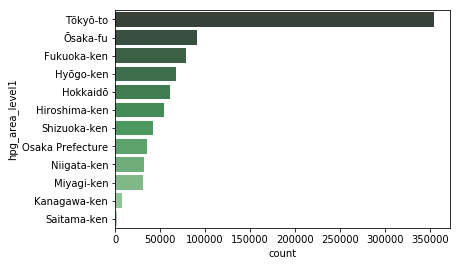

In [18]:
onlyHPG = reservations[reservations['service']=='HPG']
counts = onlyHPG['hpg_area_level1'].value_counts()
sns.countplot(y='hpg_area_level1', data=onlyHPG, order=counts.keys(), palette='Greens_d')

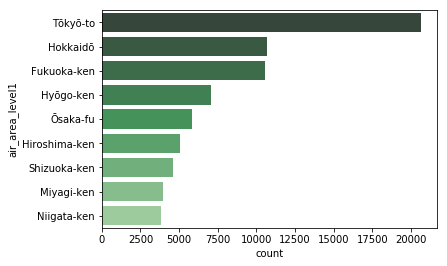

In [19]:
onlyAIR = reservations[reservations['service']=='AIR']
counts = onlyAIR['air_area_level1'].value_counts()
sns.countplot(y='air_area_level1', data=onlyAIR, order=counts.keys(), palette='Greens_d')

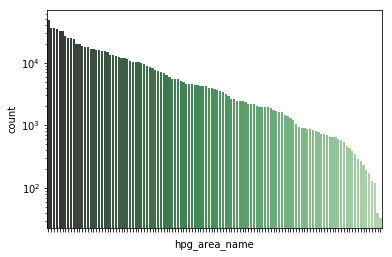

In [20]:
# onlyHPG = reservations[reservations['service']=='HPG']
onlyHPG = reservations
counts = onlyHPG['hpg_area_name'].value_counts()
ax = sns.countplot(x='hpg_area_name', data=onlyHPG, order=counts.keys(), palette='Greens_d')
ax.set_xticklabels([])
ax.set_yscale('log')

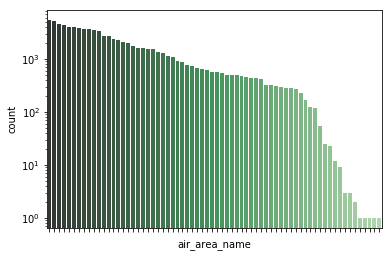

In [21]:
# onlyHPG = reservations[reservations['service']=='HPG']
onlyHPG = reservations
counts = onlyHPG['air_area_name'].value_counts()
ax = sns.countplot(x='air_area_name', data=onlyHPG, order=counts.keys(), palette='Greens_d')
ax.set_xticklabels([])
ax.set_yscale('log')

These restaurants are distributed to many cities, not just Tokyo.

## Distribution by genre

We can also see how restaurants are distributed by genres.

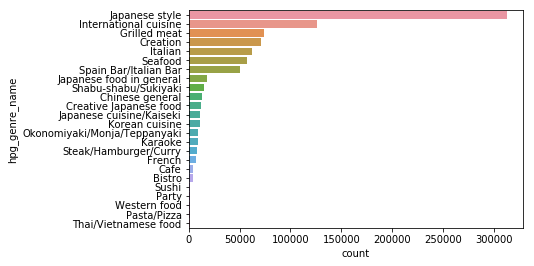

In [22]:
values = reservations['hpg_genre_name'].value_counts()
values = values[values>1000]
sns.countplot(y='hpg_genre_name', data=reservations, order=values.index)

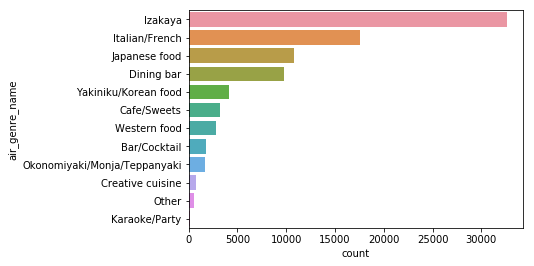

In [23]:
values = reservations['air_genre_name'].value_counts()
values = values[values>10]
sns.countplot(y='air_genre_name', data=reservations, order=values.index)

Apparently, there is a difference in focus between the two services. HPG focuses on restaurants and most of its stores are of 'Japanese style' food. AIR focuses more on pubs ('Izakaya') and cafes. 

## Inserting information about day

The information about timing is rounded to the nearest hour, always.

In [24]:
reservations['reserve_date'] = reservations['reserve_datetime'].apply(lambda x: x[:10])
reservations['reserve_hour'] = reservations['reserve_datetime'].apply(lambda x: x[11:13]).astype(int)
reservations['visit_date'] = reservations['visit_datetime'].apply(lambda x: x[:10])
reservations['visit_hour'] = reservations['visit_datetime'].apply(lambda x: x[11:13]).astype(int)
reservations.drop('reserve_datetime', axis=1, inplace=True)
reservations.drop('visit_datetime', axis=1, inplace=True)

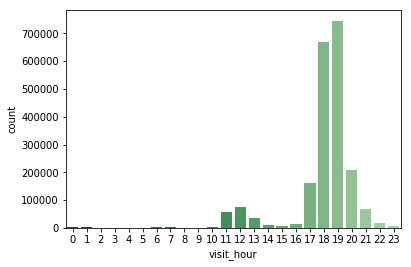

In [25]:
sns.countplot(x='visit_hour', data=reservations, order=range(24), palette='Greens_d')

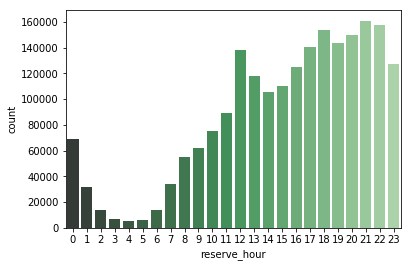

In [26]:
sns.countplot(x='reserve_hour', data=reservations, order=range(24), palette='Greens_d')

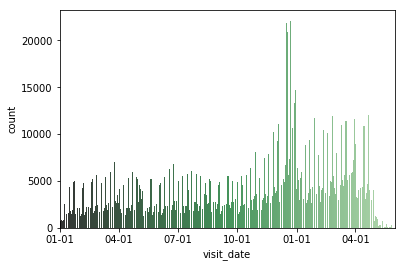

In [79]:
days = sorted(reservations['visit_date'].unique())
ax = sns.countplot(x='visit_date', data=reservations, order=days, palette='Greens_d')
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([days[x][5:] for x in ax.get_xticks()]);

In [28]:
counts = [(x,y) for x,y in reservations['visit_date'].value_counts().items()]
counts.sort(key=lambda x:x[0])
fft = py.fft([x[1] for x in counts])

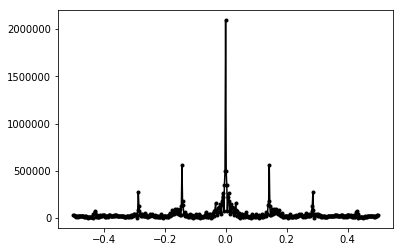

In [29]:
fig, ax = py.subplots()
y_plot = py.fftshift(fft)
x_plot = py.fftshift(py.fftfreq(len(y_plot)))
# ax.plot(y_plot.real, 'b.-')
# ax.plot(y_plot.imag, 'r.-')
ax.plot(x_plot, abs(y_plot), 'k.-')
y_lim = ax.get_ylim()
# for harmonic in range(-3,4):
#     ax.plot([harmonic/7.]*2,y_lim,'y--')
ax.set_ylim(y_lim);

In [30]:
date_info = pandas.read_csv('Data/date_info.csv')

In [31]:
reservations = reservations.merge(
    date_info,
    left_on = 'reserve_date',
    right_on = 'calendar_date',
)
reservations.rename(columns={'day_of_week': 'reserve_weekday', 'holiday_flg': 'reserve_holiday'}, inplace=True);
reservations.drop('calendar_date', axis=1, inplace=True)

In [32]:
reservations = reservations.merge(
    date_info,
    left_on = 'visit_date',
    right_on = 'calendar_date',
)
reservations.rename(columns={'day_of_week': 'visit_weekday', 'holiday_flg': 'visit_holiday'}, inplace=True);
reservations.drop('calendar_date', axis=1, inplace=True)

In [33]:
reservations.head()

,service,hpg_store_id,air_store_id,reserve_visitors,hpg_genre_name,hpg_area_name,air_genre_name,air_area_name,hpg_latitude,hpg_longitude,...,air_area_level3,air_area_level4,reserve_date,reserve_hour,visit_date,visit_hour,reserve_weekday,reserve_holiday,visit_weekday,visit_holiday
0,HPG,hpg_c63f6f42e088e50f,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,2016-01-01,9,2016-01-01,11,Friday,1,Friday,1
1,HPG,hpg_dac72789163a3f47,NaN,3,French,Hyōgo-ken Kōbe-shi None,NaN,NaN,34.692109,135.191698,...,None,None,2016-01-01,6,2016-01-01,13,Friday,1,Friday,1
2,HPG,hpg_c8e24dcf51ca1eb5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,2016-01-01,14,2016-01-01,16,Friday,1,Friday,1
3,HPG,hpg_24bb207e5fd49d4a,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,2016-01-01,11,2016-01-01,17,Friday,1,Friday,1
4,HPG,hpg_25291c542ebb3bc2,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,2016-01-01,3,2016-01-01,17,Friday,1,Friday,1


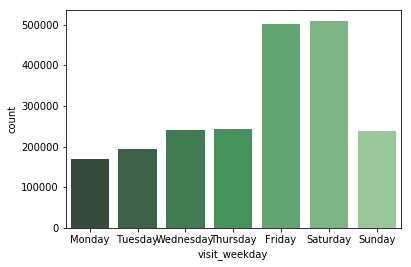

In [36]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = 'visit_weekday', data=reservations, order=order, palette='Greens_d')

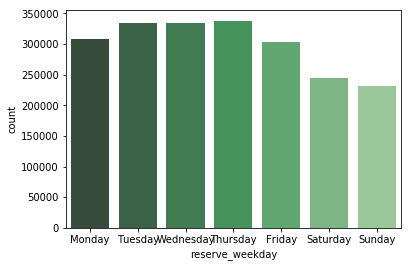

In [37]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = 'reserve_weekday', data=reservations, order=order, palette='Greens_d')

As expected, visits are concentrated in Friday and Saturday. Reservations are done throughout the working week.

In [90]:
aggregate_visits = visits.groupby('visit_date').sum()[['visitors']]
aggregate_reservations = reservations[:].groupby('visit_date').sum()[['reserve_visitors']]

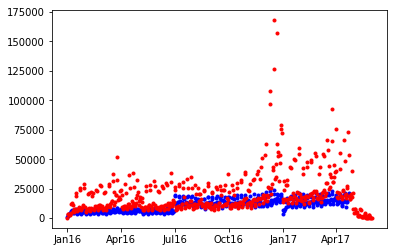

In [92]:
plot_visits = aggregate_visits['visitors']
plot_reserves = aggregate_reservations['reserve_visitors']
fig, ax = py.subplots()
ax.plot(plot_visits, 'b.')
ax.plot(plot_reserves, 'r.')
ticks = [0,91,182,274,366,456]
ticklabels = ['Jan16', 'Apr16', 'Jul16', 'Oct16', 'Jan17', 'Apr17']
ax.set_xticks(ticks);
ax.set_xticklabels(ticklabels);
# ax.set_xticklabels([aggregate_visits.index[x][5:] for x in ticks]);

In [106]:
# moving_average_visitors = pandas.rolling_mean(aggregate_visits, window=7)
moving_average_visitors = aggregate_visits['visitors'].rolling(window=7, center=False).mean()
moving_average_reserves = aggregate_reservations['reserve_visitors'].rolling(window=7, center=False).mean()


The visitation pattern has a 7-day sazonal pattern. To have a better picture, one can plot a 7-day moving average (rolling window) aggregate of the number of visitors.

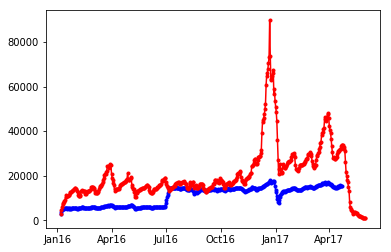

In [128]:
plot_visits = moving_average_visitors
plot_reserves = moving_average_reserves
fig, ax = py.subplots()
ax.plot(plot_visits, 'b.-')
ax.plot(plot_reserves, 'r.-')
ticks = [0,91,182,274,366,456]
ticklabels = ['Jan16', 'Apr16', 'Jul16', 'Oct16', 'Jan17', 'Apr17']
ax.set_xticks(ticks);
ax.set_xticklabels(ticklabels);
# ax.set_xticklabels([aggregate_visits.index[x][5:] for x in ticks]);

Visitation data from the AIR systems seems to work well only after July 2016, and it runs throuhg 2017-04-22. The reservation system contains reservations made between 2016-01-01 and 2017-04-22, although the visit date can fall outside this range. This is why we see some reservations made for May 2017, but at a lower number than expected.

To mitigate this, we can focus on visits in the period from 2016-07-01 and 2017-04-22.

In [149]:
reserves_ltd = reservations[(reservations['visit_date']>='2016-07-01')&(reservations['visit_date']<='2017-04-22')]
visits_ltd = visits[(visits['visit_date']>='2016-07-01')&(visits['visit_date']<='2017-04-22')]

In [148]:
reserves_ltd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530141 entries, 159908 to 2077979
Data columns (total 28 columns):
service             1530141 non-null object
hpg_store_id        1485034 non-null object
air_store_id        95041 non-null object
reserve_visitors    1530141 non-null int64
hpg_genre_name      659302 non-null object
hpg_area_name       659302 non-null object
air_genre_name      68908 non-null object
air_area_name       68908 non-null object
hpg_latitude        659302 non-null float64
hpg_longitude       659302 non-null float64
air_latitude        68908 non-null float64
air_longitude       68908 non-null float64
hpg_area_level1     647132 non-null object
hpg_area_level2     646383 non-null object
hpg_area_level3     428531 non-null object
hpg_area_level4     47717 non-null object
air_area_level1     68908 non-null object
air_area_level2     68908 non-null object
air_area_level3     68622 non-null object
air_area_level4     15515 non-null object
reserve_date        153014

In [151]:
visits_ltd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204409 entries, 47699 to 252107
Data columns (total 20 columns):
hpg_store_id       37459 non-null object
air_store_id       204409 non-null object
visit_date         204409 non-null object
visitors           204409 non-null int64
hpg_genre_name     16141 non-null object
hpg_area_name      16141 non-null object
air_genre_name     183091 non-null object
air_area_name      183091 non-null object
hpg_latitude       16141 non-null float64
hpg_longitude      16141 non-null float64
air_latitude       183091 non-null float64
air_longitude      183091 non-null float64
hpg_area_level1    15565 non-null object
hpg_area_level2    15565 non-null object
hpg_area_level3    11969 non-null object
hpg_area_level4    2266 non-null object
air_area_level1    183091 non-null object
air_area_level2    183091 non-null object
air_area_level3    182278 non-null object
air_area_level4    15672 non-null object
dtypes: float64(4), int64(1), object(15)
memory usage

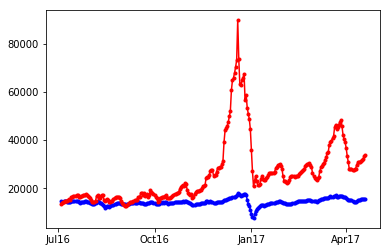

In [166]:
aggregate_visits_ltd = visits_ltd.groupby('visit_date').sum()[['visitors']]
aggregate_reserves_ltd = reserves_ltd[:].groupby('visit_date').sum()[['reserve_visitors']]
window = 7
plot_visits = aggregate_visits_ltd['visitors'].rolling(window=window, center=True).mean()
plot_reserves = aggregate_reserves_ltd['reserve_visitors'].rolling(window=window, center=True).mean()
fig, ax = py.subplots()
ax.plot(plot_visits, 'b.-')
ax.plot(plot_reserves, 'r.-')
ticks = [0,92,184,274]
ticklabels = ['Jul16', 'Oct16', 'Jan17', 'Apr17']
ax.set_xticks(ticks);
ax.set_xticklabels(ticklabels);
# ax.set_xticklabels([aggregate_visits.index[x][5:] for x in ticks]);